# ML-Agents Open a UnityEnvironment
<img src="https://github.com/Unity-Technologies/ml-agents/blob/release_21_docs/docs/images/image-banner.png?raw=true" align="middle" width="435"/>

## Setup

In [ ]:
#@title Install Rendering Dependencies { display-mode: "form" }
#@markdown (You only need to run this code when using Colab's hosted runtime)

import os
from IPython.display import HTML, display

def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))

pro_bar = display(progress(0, 100), display_id=True)

try:
  import google.colab
  INSTALL_XVFB = True
except ImportError:
  INSTALL_XVFB = 'COLAB_ALWAYS_INSTALL_XVFB' in os.environ

if INSTALL_XVFB:
  with open('frame-buffer', 'w') as writefile:
    writefile.write("""#taken from https://gist.github.com/jterrace/2911875
XVFB=/usr/bin/Xvfb
XVFBARGS=":1 -screen 0 1024x768x24 -ac +extension GLX +render -noreset"
PIDFILE=./frame-buffer.pid
case "$1" in
  start)
    echo -n "Starting virtual X frame buffer: Xvfb"
    /sbin/start-stop-daemon --start --quiet --pidfile $PIDFILE --make-pidfile --background --exec $XVFB -- $XVFBARGS
    echo "."
    ;;
  stop)
    echo -n "Stopping virtual X frame buffer: Xvfb"
    /sbin/start-stop-daemon --stop --quiet --pidfile $PIDFILE
    rm $PIDFILE
    echo "."
    ;;
  restart)
    $0 stop
    $0 start
    ;;
  *)
        echo "Usage: /etc/init.d/xvfb {start|stop|restart}"
        exit 1
esac
exit 0
    """)
  !sudo apt-get update
  pro_bar.update(progress(10, 100))
  !sudo DEBIAN_FRONTEND=noninteractive apt install -y daemon wget gdebi-core build-essential libfontenc1 libfreetype6 xorg-dev xorg
  pro_bar.update(progress(20, 100))
  !wget http://security.ubuntu.com/ubuntu/pool/main/libx/libxfont/libxfont1_1.5.1-1ubuntu0.16.04.4_amd64.deb 2>&1
  pro_bar.update(progress(30, 100))
  !wget --output-document xvfb.deb http://security.ubuntu.com/ubuntu/pool/universe/x/xorg-server/xvfb_1.18.4-0ubuntu0.12_amd64.deb 2>&1
  pro_bar.update(progress(40, 100))
  !sudo dpkg -i libxfont1_1.5.1-1ubuntu0.16.04.4_amd64.deb 2>&1
  pro_bar.update(progress(50, 100))
  !sudo dpkg -i xvfb.deb 2>&1
  pro_bar.update(progress(70, 100))
  !rm libxfont1_1.5.1-1ubuntu0.16.04.4_amd64.deb
  pro_bar.update(progress(80, 100))
  !rm xvfb.deb
  pro_bar.update(progress(90, 100))
  !bash frame-buffer start
  os.environ["DISPLAY"] = ":1"
pro_bar.update(progress(100, 100))

### Installing ml-agents

In [1]:
try:
  import mlagents
  print("ml-agents already installed")
except ImportError:
  !python -m pip install -q mlagents==1.0.0
  print("Installed ml-agents")

ml-agents already installed


## Run the Environment

In [2]:
#@title Select Environment { display-mode: "form" }
env_id = "GridWorld" #@param ['Basic', '3DBall', '3DBallHard', 'GridWorld', 'Hallway', 'VisualHallway', 'CrawlerDynamicTarget', 'CrawlerStaticTarget', 'Bouncer', 'SoccerTwos', 'PushBlock', 'VisualPushBlock', 'WallJump', 'Tennis', 'Reacher', 'Pyramids', 'VisualPyramids', 'Walker', 'FoodCollector', 'VisualFoodCollector', 'StrikersVsGoalie', 'WormStaticTarget', 'WormDynamicTarget']


### Start Environment from the registry

In [3]:
# -----------------
# This code is used to close an env that might not have been closed before
try:
  env.close()
except:
  pass
# -----------------

from mlagents_envs.registry import default_registry

env = default_registry[env_id].make()

[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

### Reset the environment
To reset the environment, simply call `env.reset()`. This method takes no argument and returns nothing but will send a signal to the simulation to reset.

In [4]:
env.reset()

### Behavior Specs


#### Get the Behavior Specs from the Environment

In [5]:
# We will only consider the first Behavior
behavior_name = list(env.behavior_specs)[0]
print(f"Name of the behavior : {behavior_name}")
spec = env.behavior_specs[behavior_name]

Name of the behavior : GridWorld?team=0


#### Get the Observation Space from the Behavior Specs

In [6]:
# Examine the number of observations per Agent
print("Number of observations : ", len(spec.observation_specs))

# Is there a visual observation ?
# Visual observation have 3 dimensions: Height, Width and number of channels
vis_obs = any(len(spec.shape) == 3 for spec in spec.observation_specs)
print("Is there a visual observation ?", vis_obs)

Number of observations :  2
Is there a visual observation ? True


#### Get the Action Space from the Behavior Specs

In [7]:
# Is the Action continuous or multi-discrete ?
if spec.action_spec.continuous_size > 0:
  print(f"There are {spec.action_spec.continuous_size} continuous actions")
if spec.action_spec.is_discrete():
  print(f"There are {spec.action_spec.discrete_size} discrete actions")


# How many actions are possible ?
#print(f"There are {spec.action_size} action(s)")

# For discrete actions only : How many different options does each action has ?
if spec.action_spec.discrete_size > 0:
  for action, branch_size in enumerate(spec.action_spec.discrete_branches):
    print(f"Action number {action} has {branch_size} different options")



There are 1 discrete actions
Action number 0 has 5 different options


### Stepping the environment

#### Get the steps from the Environment
You can do this with the `env.get_steps(behavior_name)` method. If there are multiple behaviors in the Environment, you can call this method with each of the behavior's names.
_Note_ This will not move the simulation forward.

In [8]:
decision_steps, terminal_steps = env.get_steps(behavior_name)

#### Set actions for each behavior
You can set the actions for the Agents of a Behavior by calling `env.set_actions()` you will need to specify the behavior name and pass a tensor of dimension 2. The first dimension of the action must be equal to the number of Agents that requested a decision during the step.

In [9]:
env.set_actions(behavior_name, spec.action_spec.empty_action(len(decision_steps)))

#### Move the simulation forward
Call `env.step()` to move the simulation forward. The simulation will progress until an Agent requestes a decision or terminates.

In [10]:
env.step()

### Observations

#### Show the observations for one of the Agents
`DecisionSteps.obs` is a tuple containing all of the observations for all of the Agents with the provided Behavior name.
Each value in the tuple is an observation tensor containing the observation data for all of the agents.

Here is the first visual observation


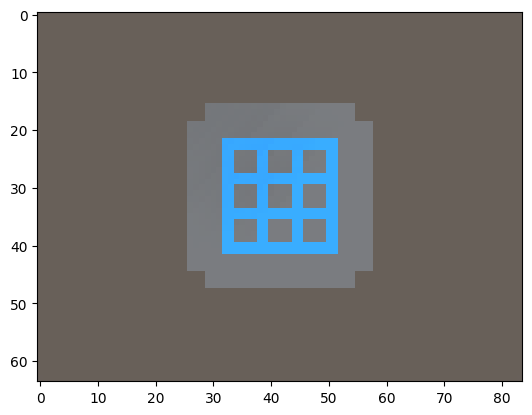

First vector observations :  [1. 0.]


In [11]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

for index, obs_spec in enumerate(spec.observation_specs):
  if len(obs_spec.shape) == 3:
    print("Here is the first visual observation")
    plt.imshow(np.moveaxis(decision_steps.obs[index][0, :, :, :], 0, -1))
    plt.show()

for index, obs_spec in enumerate(spec.observation_specs):
  if len(obs_spec.shape) == 1:
    print("First vector observations : ", decision_steps.obs[index][0,:])

### Run the Environment for a few episodes

In [12]:
for episode in range(3):
  env.reset()
  decision_steps, terminal_steps = env.get_steps(behavior_name)
  tracked_agent = -1 # -1 indicates not yet tracking
  done = False # For the tracked_agent
  episode_rewards = 0 # For the tracked_agent
  while not done:
    # Track the first agent we see if not tracking
    # Note : len(decision_steps) = [number of agents that requested a decision]
    if tracked_agent == -1 and len(decision_steps) >= 1:
      tracked_agent = decision_steps.agent_id[0]

    # Generate an action for all agents
    action = spec.action_spec.random_action(len(decision_steps))

    # Set the actions
    env.set_actions(behavior_name, action)

    # Move the simulation forward
    env.step()

    # Get the new simulation results
    decision_steps, terminal_steps = env.get_steps(behavior_name)
    if tracked_agent in decision_steps: # The agent requested a decision
      episode_rewards += decision_steps[tracked_agent].reward
    if tracked_agent in terminal_steps: # The agent terminated its episode
      episode_rewards += terminal_steps[tracked_agent].reward
      done = True
  print(f"Total rewards for episode {episode} is {episode_rewards}")


Total rewards for episode 0 is -1.1499999966472387
Total rewards for episode 1 is -1.5599999874830246
Total rewards for episode 2 is -1.049999998882413


### Close the Environment to free the port it is using

In [13]:
env.close()
print("Closed environment")


Closed environment
